In [ ]:
# Import library
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('/content/boston.csv')
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
# check duplicate
df.duplicated().sum()

0

In [ ]:
# Check missing value
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
df.medv.describe()

,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


<Axes: xlabel='medv', ylabel='Count'>

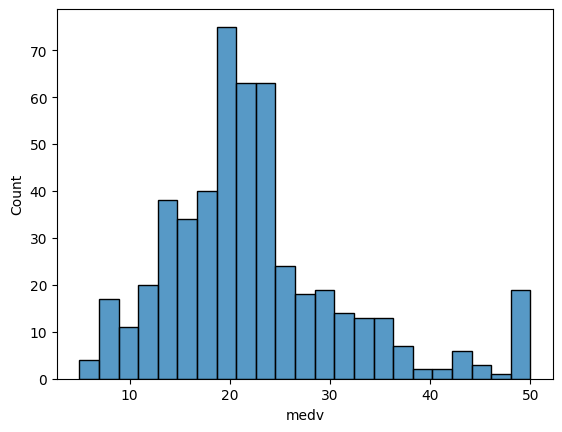

In [ ]:
# y = medv
import seaborn as sns
sns.histplot(data=df, x="medv")

# Split dataset

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv') # X
target = df[['medv']] # Y

# First splitting: pretrain and test
feature_medv_pretrain, feature_medv_test, target_medv_pretrain, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.20, random_state=42)

In [ ]:
# X_train
feature_medv_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
244,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330,19.1,372.49,12.50
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16


In [ ]:
# y_train
target_medv_train.head()

,medv
54,18.9
28,18.4
423,13.4
244,17.6
111,22.8


In [ ]:
# X_val
feature_medv_validation.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384,20.9,387.69,14.09
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,395.04,12.60
432,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,24,666,20.2,97.95,12.03
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38


In [ ]:
# y_val
target_medv_validation.head()

,medv
37,21.0
107,20.4
130,19.2
432,16.1
404,8.5


In [ ]:
# X_test
feature_medv_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27


In [ ]:
# y_test
target_medv_test.head()

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1


# Multicolinearity Check

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


- rad dan tax memiliki nilai VIF yang tinggi sehingga masuk kedalam kategori Multikolinearitas tingkat menengah

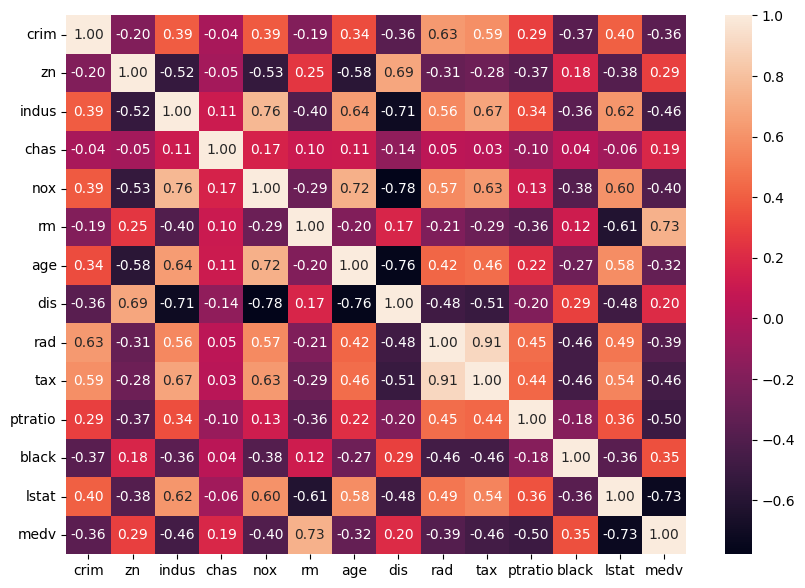

In [ ]:
# heatmap correlation
medv_train = pd.concat([feature_medv_train, target_medv_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

- Dari rad dan tax yang memiliki nilai VIF yang tinggi, kita akan drop salah satu dengan mempertimbangkan mana yang lebih kuat korelasinya terhadap medv.
- tax memiliki korelasi yang lebih kuat terhadap medv dibandingkan dengan rad, sehingga kita bisa melakukan drop pada kolom rad

In [ ]:
feature_medv_train = feature_medv_train.drop(columns=['rad'])
feature_medv_validation = feature_medv_validation.drop(columns=['rad'])
feature_medv_test = feature_medv_test.drop(columns=['rad'])

In [ ]:
# Recheck
X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


- Setelah di chek kembali nilai VIF yang tinggi pada tax tadi sudah berkurang

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train,))

multi_reg.fit(X_medv_train, y_medv_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_medv_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.828774
1,crim,-0.076956
2,zn,0.025653
3,indus,-0.005538
4,chas,3.299622
5,nox,-17.872107
6,rm,5.168419
7,age,-0.004688
8,dis,-1.509215
9,tax,0.000791


**Interpretasi :**
1. Intercept (22.828774):
Intercept adalah titik awal atau nilai dasar dari harga rumah (medv) ketika semua fitur lainnya bernilai nol. Dalam konteks harga rumah di Boston, intercept menunjukkan nilai dasar harga rumah, tetapi jarang memiliki interpretasi yang bermakna jika semua fitur bernilai nol tidak relevan dalam kehidupan nyata.
2. Crim (Criminal rate, -0.076956):
Crim mewakili tingkat kriminalitas di suatu area. Koefisien negatif (-0.076956) menunjukkan bahwa semakin tinggi tingkat kriminalitas, semakin rendah harga rumah (medv). Setiap peningkatan 1 unit dalam tingkat kriminalitas akan mengurangi harga rumah sekitar 0.076956, dengan asumsi semua fitur lain tetap konstan.
3. Zn (Residential land zoned proportion, 0.025653):
Zn adalah proporsi area perumahan untuk zonasi rumah besar. Koefisien positif (0.025653) menunjukkan bahwa area dengan persentase zonasi perumahan yang lebih tinggi cenderung memiliki harga rumah yang lebih tinggi. Setiap peningkatan 1 unit pada "zn" akan meningkatkan harga rumah sekitar 0.025653.
4. Indus (Non-retail business acres proportion, -0.005538):
Indus adalah proporsi area bisnis non-ritel di kota. Koefisien negatif (-0.005538) menunjukkan bahwa area dengan lebih banyak lahan bisnis cenderung memiliki harga rumah yang sedikit lebih rendah, mungkin karena area bisnis non-ritel cenderung kurang menarik untuk hunian. Setiap kenaikan 1 unit pada "indus" menurunkan harga rumah sekitar 0.005538.
5. Chas (Is bounds with river, 3.299622):
Chas adalah variabel biner yang menunjukkan apakah properti berdekatan dengan sungai (nilai 1 jika berdekatan, 0 jika tidak). Koefisien positif (3.299622) menunjukkan bahwa properti yang berdekatan dengan sungai cenderung memiliki harga yang lebih tinggi. Ini masuk akal karena properti di dekat sungai sering kali lebih menarik bagi pembeli rumah. Jika properti berada di dekat sungai, harga rumah meningkat sekitar 3.299622.
6. Nox (Nitrogen oxides concentration, -17.872107):
Nox adalah konsentrasi oksida nitrogen, yang menunjukkan tingkat polusi udara. Koefisien negatif besar (-17.872107) menunjukkan bahwa area dengan tingkat polusi yang lebih tinggi cenderung memiliki harga rumah yang lebih rendah. Setiap kenaikan 1 unit pada "nox" mengurangi harga rumah sekitar 17.872107, menunjukkan dampak signifikan dari polusi terhadap nilai properti.
7. Rm (Number rooms average, 5.168419):
Rm adalah jumlah rata-rata kamar per tempat tinggal. Koefisien positif (5.168419) menunjukkan bahwa rumah dengan lebih banyak kamar cenderung memiliki harga yang lebih tinggi. Setiap tambahan 1 kamar akan meningkatkan harga rumah sekitar 5.168419, dengan asumsi variabel lain tetap konstan.
8. Age (Owner age proportion, -0.004688):
Age adalah proporsi unit yang dibangun sebelum tahun tertentu, mewakili usia bangunan. Koefisien negatif (-0.004688) menunjukkan bahwa area dengan rumah yang lebih tua cenderung memiliki harga rumah yang lebih rendah. Setiap peningkatan 1 unit dalam "age" mengurangi harga rumah sekitar 0.004688.
9. Dis (Weighted distance to cities, -1.509215):
Dis adalah jarak tertimbang dari kota-kota pusat. Koefisien negatif (-1.509215) menunjukkan bahwa area yang lebih jauh dari pusat kota cenderung memiliki harga rumah yang lebih rendah. Setiap peningkatan 1 unit pada "dis" menurunkan harga rumah sekitar 1.509215, mungkin karena akses ke fasilitas perkotaan yang lebih sulit.
10. Tax (Tax rate, 0.000791):
Tax adalah tingkat pajak properti di area tersebut. Koefisien positif kecil (0.000791) menunjukkan bahwa peningkatan tingkat pajak sedikit meningkatkan harga rumah. Ini mungkin tampak kontraintuitif, tetapi bisa jadi area dengan pajak lebih tinggi memiliki layanan yang lebih baik atau dianggap lebih eksklusif. Setiap peningkatan 1 unit pada "tax" meningkatkan harga rumah sekitar 0.000791.
11. Ptratio (Pupil-teacher ratio, -0.865809):
Ptratio adalah rasio murid-guru di distrik tersebut. Koefisien negatif (-0.865809) menunjukkan bahwa rasio murid-guru yang lebih tinggi (lebih banyak murid per guru) berasosiasi dengan harga rumah yang lebih rendah, mungkin karena kualitas pendidikan yang dianggap lebih rendah. Setiap kenaikan 1 unit dalam rasio ini menurunkan harga rumah sekitar 0.865809.
12. Black (Black proportion, 0.011914):
Black adalah proporsi individu berkulit hitam di wilayah tersebut. Koefisien positif kecil (0.011914) menunjukkan bahwa setiap peningkatan 1 unit pada variabel ini sedikit meningkatkan harga rumah sebesar 0.011914. Namun, interpretasi koefisien ini harus dilakukan dengan hati-hati mengingat sensitivitas sosial terkait demografi.
13. Lstat (Percent lower status, -0.449527):
Lstat adalah persentase penduduk dengan status ekonomi rendah. Koefisien negatif (-0.449527) menunjukkan bahwa area dengan persentase penduduk berstatus rendah yang lebih tinggi cenderung memiliki harga rumah yang lebih rendah. Setiap kenaikan 1 unit pada "lstat" mengurangi harga rumah sekitar 0.449527.

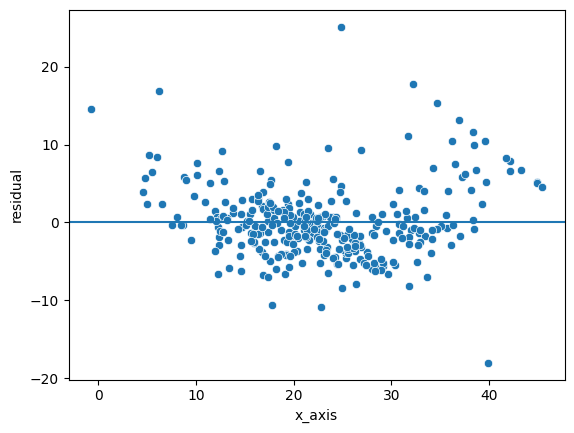

In [ ]:
# calculate residuals
y_predict_train = multi_reg.predict(X_medv_train)
residual = y_medv_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

In [ ]:
# Model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))

R-squared for training data is 0.7589590996441187
RMSE for training data is 4.679035139957256


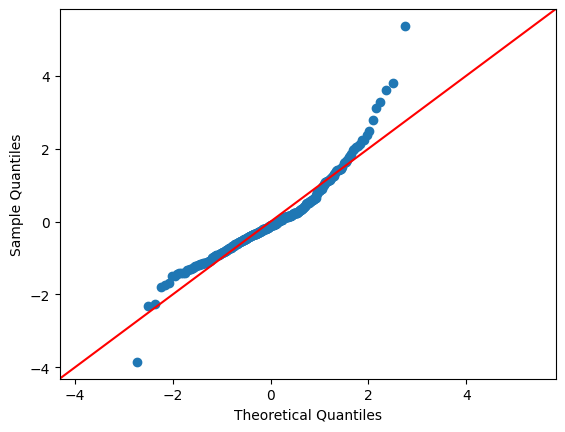

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = multi_reg.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))

RMSE for testing data is 5.193927767323367


# Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.94941253512279
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579992
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


- Model Ridge dengan alpha = 10 memiliki nilai RMSE paling kecil sehingga model inilah yang dipilih untuk digunakan

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


- Intercept (15.064666):
Intercept adalah nilai dasar dari target (harga rumah) ketika semua fitur bernilai nol. Ini merupakan nilai harga dasar rumah dalam model ini.
- Crim (Crime rate, -0.071408):
Tingkat kriminalitas memiliki koefisien negatif, yang berarti semakin tinggi tingkat kriminalitas di suatu area, semakin rendah harga rumah. Meski efeknya kecil, ini menunjukkan bahwa keamanan lingkungan berdampak negatif pada harga rumah.
- Zn (Residential land zoned proportion, 0.033030):
Proporsi area yang dialokasikan untuk rumah besar memiliki koefisien positif, yang menunjukkan bahwa area dengan lebih banyak lahan untuk rumah besar cenderung memiliki harga rumah yang lebih tinggi.
- Indus (Non-retail business acres proportion, -0.067858):
Koefisien negatif untuk proporsi lahan industri menunjukkan bahwa semakin banyak lahan yang dialokasikan untuk bisnis non-ritel, harga rumah cenderung lebih rendah, mungkin karena persepsi bahwa area bisnis kurang ideal untuk hunian.
- Chas (Bounds with river, 1.955801):
Variabel ini merupakan variabel biner yang menunjukkan apakah properti berbatasan dengan sungai. Koefisien positif besar menunjukkan bahwa berada di dekat sungai memberikan nilai tambah yang signifikan pada harga rumah.
- Nox (Nitrogen oxides concentration, -1.568248):
Konsentrasi nitrogen oksida, yang mencerminkan tingkat polusi, memiliki koefisien negatif signifikan. Ini menunjukkan bahwa area dengan polusi udara lebih tinggi cenderung memiliki harga rumah yang lebih rendah.
- Rm (Average number of rooms, 4.783168):
Jumlah kamar per rumah memiliki koefisien positif yang besar, menunjukkan bahwa semakin banyak kamar, harga rumah cenderung lebih tinggi secara signifikan. Ini adalah salah satu faktor yang paling berpengaruh dalam model ini.
- Age (Proportion of older homes, -0.011523):
Proporsi unit yang lebih tua memiliki koefisien negatif kecil. Ini menunjukkan bahwa area dengan rumah-rumah yang lebih tua mungkin memiliki harga rumah yang sedikit lebih rendah.
- Dis (Weighted distance to city centers, -1.260056):
Jarak tertimbang ke pusat kota memiliki koefisien negatif yang cukup besar, yang menunjukkan bahwa semakin jauh dari pusat kota, harga rumah cenderung lebih rendah. Ini mungkin mencerminkan preferensi untuk lokasi yang lebih dekat dengan fasilitas perkotaan.
- Tax (Property tax rate, -0.001976):
Tingkat pajak properti memiliki koefisien negatif kecil, yang menunjukkan bahwa pajak properti yang lebih tinggi sedikit mengurangi harga rumah, meskipun efeknya tidak terlalu besar.
- Ptratio (Pupil-teacher ratio, -0.697550):
Rasio murid-guru memiliki koefisien negatif, yang menunjukkan bahwa semakin tinggi rasio ini (lebih banyak murid per guru), semakin rendah harga rumah. Ini dapat terkait dengan persepsi bahwa rasio murid-guru yang tinggi mungkin mengindikasikan kualitas pendidikan yang lebih rendah.
- Black (Proportion of Black population, 0.012729):
Proporsi populasi berkulit hitam memiliki koefisien positif kecil. Ini menunjukkan hubungan positif yang sangat kecil dengan harga rumah, meskipun pengaruhnya minimal.
- Lstat (Percentage of lower socioeconomic status, -0.523827):
Persentase populasi dengan status sosial ekonomi rendah memiliki koefisien negatif yang cukup besar, yang menunjukkan bahwa area dengan populasi berstatus lebih rendah cenderung memiliki harga rumah yang lebih rendah.

Model Ridge dengan alpha = 10 mempertahankan semua fitur dalam model tetapi mengurangi beberapa koefisien (misalnya, zn, age, tax, black) yang menunjukkan bahwa fitur-fitur tersebut kurang berpengaruh dibandingkan fitur lainnya seperti rm, nox, dis, dan chas. Koefisien dengan nilai absolut besar (rm, nox, chas, dis, lstat) menunjukkan fitur-fitur yang paling berpengaruh dalam menentukan harga rumah.

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)


Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of lasso regression model with alpha = {alpha} is {rmse}')

RMSE of lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of lasso regression model with alpha = 10 is 5.426622694252769


- Model Lasso dengan alpha = 1 merupakan model dengan nilai RMSE terkecil sehingga model inilah yang dipilih

In [ ]:
# coeffs
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


- Intercept (25.823435): Ini adalah nilai dasar harga rumah ketika semua fitur lainnya bernilai nol. Ini menunjukkan harga dasar dari rumah.
- Crim (Criminal rate, -0.041076): Tingkat kriminalitas memiliki koefisien negatif, menunjukkan bahwa semakin tinggi tingkat kriminalitas, semakin rendah harga rumah. Efeknya kecil, tetapi signifikan.
- Zn (Residential land zoned proportion, 0.025273): Proporsi area untuk zonasi rumah besar memiliki koefisien positif. Ini menunjukkan bahwa area dengan lebih banyak lahan untuk rumah besar cenderung memiliki harga rumah yang lebih tinggi.
- Indus (Non-retail business acres proportion, 0.000000): Koefisien untuk variabel ini adalah nol, yang berarti fitur ini tidak berkontribusi signifikan terhadap prediksi harga rumah dalam model ini dan dianggap tidak relevan.
- Chas (Is bounds with river, 0.000000): Koefisien nol menunjukkan bahwa berada di dekat sungai (variabel biner) tidak berkontribusi signifikan terhadap harga rumah dalam model ini.
- Nox (Nitrogen oxides concentration, -0.000000): Konsentrasi nitrogen oksida, yang terkait dengan polusi, juga tidak berkontribusi pada model ini. Dengan koefisien nol, fitur ini dianggap tidak relevan.
- Rm (Number rooms average, 2.504122): Jumlah rata-rata kamar per rumah memiliki koefisien positif yang cukup besar, menunjukkan bahwa lebih banyak kamar cenderung meningkatkan harga rumah secara signifikan.
- Age (Owner age proportion, 0.022055): Proporsi unit yang lebih tua memiliki koefisien positif kecil, yang menunjukkan bahwa area dengan rumah yang lebih tua sedikit meningkatkan harga rumah, meskipun dampaknya tidak terlalu besar.
- Dis (Weighted distance to cities, -0.599362): Jarak tertimbang ke pusat kota memiliki koefisien negatif, menunjukkan bahwa area yang lebih jauh dari pusat kota cenderung memiliki harga rumah yang lebih rendah.
- Tax (Tax rate, -0.002994): Tingkat pajak properti memiliki koefisien negatif kecil, menunjukkan bahwa pajak yang lebih tinggi sedikit menurunkan harga rumah.
- Ptratio (Pupil-teacher ratio, -0.666222): Rasio murid-guru memiliki koefisien negatif, menunjukkan bahwa semakin tinggi rasio ini (lebih banyak murid per guru), semakin rendah harga rumah. Ini mungkin terkait dengan persepsi kualitas pendidikan di daerah tersebut.
- Black (Black proportion, 0.011400): Proporsi individu berkulit hitam memiliki koefisien positif kecil. Meski berkontribusi positif, dampaknya tidak terlalu besar.
- Lstat (Percent lower status, -0.712433): Persentase populasi dengan status sosial ekonomi rendah memiliki koefisien negatif yang cukup besar, menunjukkan bahwa area dengan populasi berstatus lebih rendah cenderung memiliki harga rumah yang lebih rendah.

Model Lasso telah menyederhanakan model dengan mengeliminasi beberapa fitur tidak relevan (koefisien nol), yaitu Indus, Chas, dan Nox, menunjukkan bahwa fitur-fitur tersebut tidak berkontribusi signifikan dalam memprediksi harga rumah.